<div align="center" style="color:Blue;font-size:20px">Predicting price of old cars using Regression Tree</div>

### *Data Loading*

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score,KFold,cross_val_predict
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [2]:
df=pd.read_csv("DS2_C5_S5_OldCars_Data_Challenge.csv")
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


### *Data Exploration*

In [3]:
df.shape

(7253, 14)

In [4]:
df.columns

Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [6]:
df.describe()

,S.No.,Year,Kilometers_Driven,Seats,Price
count,7253.000000,7253.000000,7.253000e+03,7200.000000,6019.000000
mean,3626.000000,2013.365366,5.869906e+04,5.279722,9.479468
std,2093.905084,3.254421,8.442772e+04,0.811660,11.187917
min,0.000000,1996.000000,1.710000e+02,0.000000,0.440000
25%,1813.000000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3626.000000,2014.000000,5.341600e+04,5.000000,5.640000
75%,5439.000000,2016.000000,7.300000e+04,5.000000,9.950000
max,7252.000000,2019.000000,6.500000e+06,10.000000,160.000000


### *Data Preprocessing*

- checking for null values

In [7]:
100*df.isnull().sum()/df.shape[0]

S.No.                 0.000000
Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.027575
Engine                0.634220
Power                 0.634220
Seats                 0.730732
New_Price            86.129877
Price                17.013650
dtype: float64

- Dropping the new_price column since 86% values are null and also sl.no which is irrelevant

In [8]:
df.drop(["New_Price","S.No."],axis=1,inplace=True)

- Imputing seats with mode

In [9]:
df["Seats"]=df["Seats"].fillna(df["Seats"].mode()[0])

- Since our target variable Price contains null values,deleting those rows instead of imputing so that it wont affect model.
- Rest 3 features has limited nan so not an issue

In [10]:
df.dropna(inplace=True)

In [11]:
df.shape

(5981, 12)

- Cleaning data: Splitting numbers from "Mileage","Engine","Power" and removing "Null" present in power and converting to int

In [12]:
c=["Mileage","Engine","Power"]
for i in c:
    df[i]=df[i].apply(lambda x:x.split(" ")[0])

In [13]:
df.drop(index=df[df["Power"]=="null"].index,inplace=True)

In [14]:
for i in c:
    df[c]=df[c].astype("float")

<AxesSubplot:xlabel='Kilometers_Driven'>

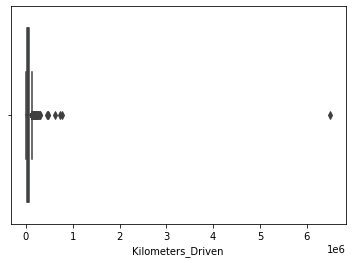

In [15]:
sb.boxplot(data=df,x="Kilometers_Driven")

<AxesSubplot:xlabel='Price'>

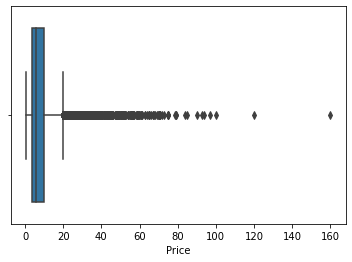

In [16]:
sb.boxplot(data=df,x="Price")

In [17]:
df=df[df["Kilometers_Driven"]<400000]

In [18]:
df=df[df["Price"]<100]

In [19]:
df.shape

(5864, 12)

In [20]:
df.reset_index(inplace=True)

In [21]:
df.head()

,index,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


### Data Visualization

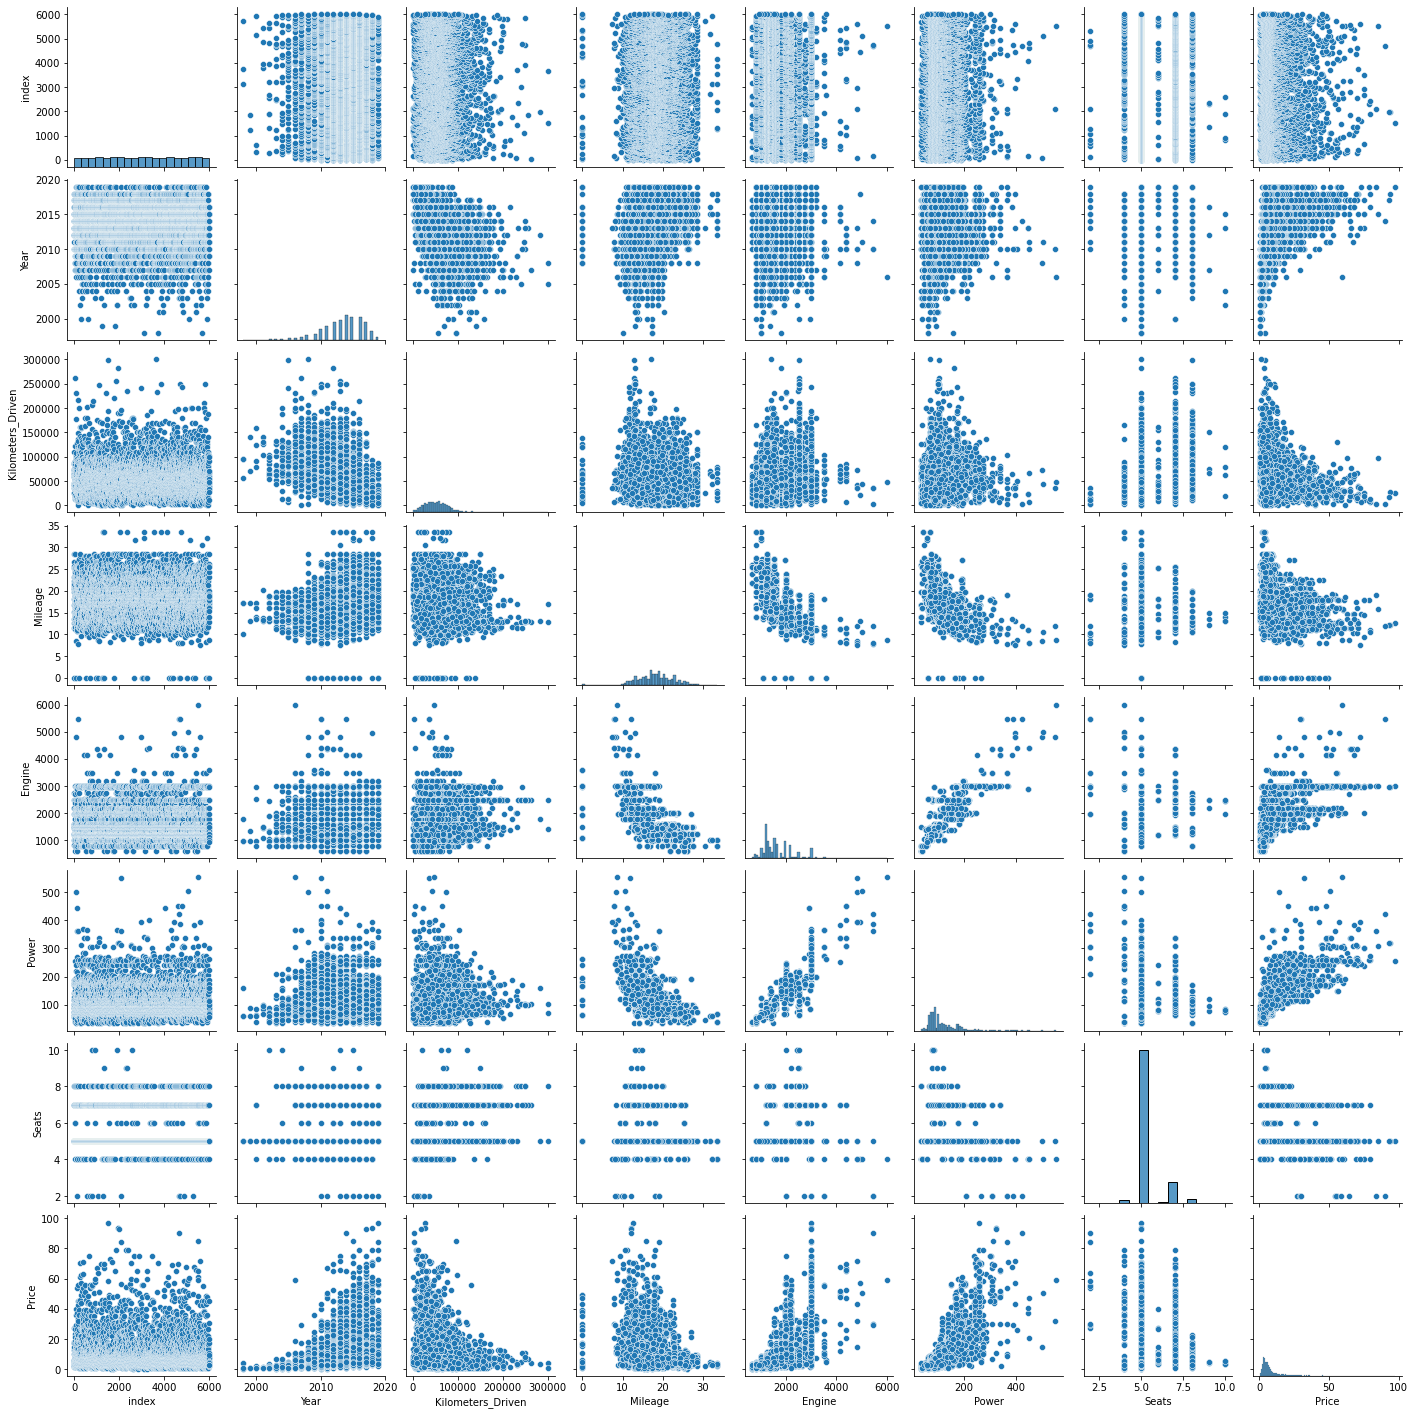

In [22]:
sb.pairplot(df)

<AxesSubplot:>

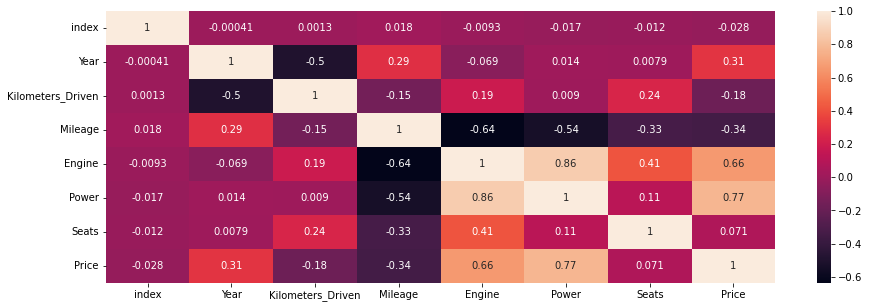

In [23]:
plt.figure(figsize=(15,5))
sb.heatmap(df.corr(),annot=True)

- 

- Year represents car's age(present-year) .as age increases its price decreases
- kilometer's driven is inversely proportional to car's price
- mileage is also inversely proportional to car's price
- Engine and Power is highly correlated with car's price. 
- number of seats doesnt have any affect on its price

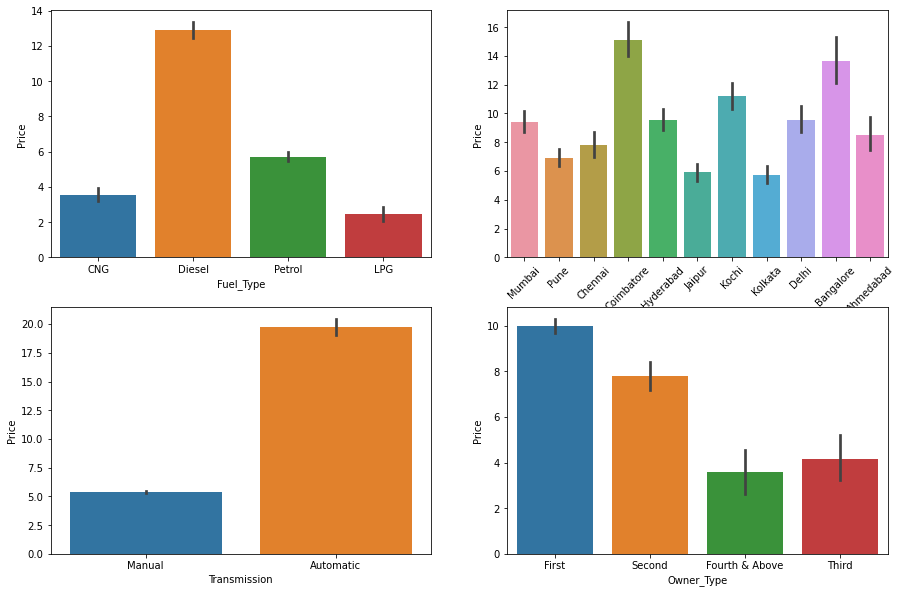

In [24]:
plt.figure(figsize=(15,10))
plt.subplot(221)
sb.barplot(data=df,x="Fuel_Type",y="Price")
plt.subplot(222)
sb.barplot(data=df,x="Location",y="Price")
plt.xticks(rotation=45)
plt.subplot(223)
sb.barplot(data=df,x="Transmission",y="Price")
plt.subplot(224)
sb.barplot(data=df,x="Owner_Type",y="Price")
plt.show()

- Diesel old cars have high mean price
- Automatic transmission type old cars have high mean price
- first hand cars have high resale value
- best city are comibatore followed by bengaluru wrt old cars price

### Feature Engineering

- Label Encoding

In [25]:
l=df.select_dtypes(include="object")
for i in l:
    df[i]=df[i].astype("category")
for i in l:
    df[i]=LabelEncoder().fit_transform(df[i])

- Feature Scaling

In [26]:
df1=df.iloc[:,:-1]
y=df["Price"]
scaler=StandardScaler()
df=pd.DataFrame(scaler.fit_transform(df1),columns=df1.columns)
df["Price"]=y

- Feature Selection: As seen from correlation matrix before i will be considering top correlated features with target price:  Engine & Power
- But after checking, considering all parameters for our model since it has better accuracy

In [27]:
x=df.iloc[:,:-1]
#x=df[["Engine","Mileage"]]
y=df["Price"]

### Model Building 

- Train Test Split 

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=30)

- Finding optimal max depth from KFOLD cross validation method which has low RMSE value

In [29]:
kf = KFold(n_splits=10, shuffle=False, random_state=None)
l=[0]*10
for i in range(1,11):
    score=cross_val_score(DecisionTreeRegressor(max_depth=i,random_state=40),x,y,cv=kf,scoring="neg_mean_squared_error")
    s=score.mean()
    rmse=np.sqrt(-s)
    l[i-1]=rmse
opt=l.index(min(l))+1
print("Optimal max Depth=",opt)

Optimal max Depth= 9


- Decision Tree Regressor using max depth based on K FOLD cross validator

In [30]:
model=DecisionTreeRegressor(max_depth=opt,min_samples_split=10,min_samples_leaf=10).fit(x_train,y_train)

- Training R^2

In [31]:
model.score(x_train,y_train)

0.9151820948583665

- Test R^2

In [32]:
model.score(x_test,y_test)

0.8345807869919133

- y actual and predicted

In [33]:
y_pred=model.predict(x_test)
y_df=pd.DataFrame({"actual":y_test,"predicted":y_pred})
y_df.head()

,actual,predicted
262,3.25,3.623684
5211,6.75,9.305714
5813,5.94,5.592216
813,10.75,11.685455
4629,11.50,10.374706


- Evaluation Metrics: Mean Square Error,Mean Absolute Error,Root Mean Squared Error

In [34]:
MSE=mean_squared_error(y_test,y_pred)
MAE=mean_absolute_error(y_test,y_pred)
RMSE=np.sqrt(MSE)
MSE,MAE,RMSE

(19.160699707268172, 2.049935835958955, 4.377293651020933)

- Comparing models for different train test splits of data and displayed their R^2 values

In [44]:
kf=KFold(n_splits=10,shuffle=True,random_state=30)
m=DecisionTreeRegressor(max_depth=10,min_samples_split=5,min_samples_leaf=10)
score=cross_val_score(m,x,y,scoring="r2",cv=kf)
print("R^2 mean of all folds:",score.mean())
score

R^2 mean of all folds 0.8574006034123547


array([0.83434527, 0.81451428, 0.8834234 , 0.8555695 , 0.84601924,
       0.87248094, 0.87294506, 0.88630909, 0.8601717 , 0.84822754])

- 10 pairs of train and test data

In [36]:
#i=1
for train, test in kf.split(x,y):
#     if i==2:
#         x_train,x_test=x.loc[train],x.loc[test]
#         y_train,y_test=y.loc[train],y.loc[test]
#     i=i+1
      print("Train data",x.loc[train],y.loc[train],"Test data",x.loc[test],y.loc[test])

Train data          index      Name  Location      Year  Kilometers_Driven  Fuel_Type  \
0    -1.734206  0.524002  1.146957 -1.097598           0.456246  -1.881756   
2    -1.733055 -0.800687 -1.225803 -0.781829          -0.319485   1.094942   
3    -1.732479  0.262989 -1.225803 -0.466060           0.903783  -0.889524   
4    -1.731903 -1.681851 -0.886837 -0.150292          -0.478510  -0.889524   
5    -1.731327 -0.714337 -0.208906 -0.466060           0.545754   0.102709   
...        ...       ...       ...       ...                ...        ...   
5859  1.727912  0.445502 -0.547871  0.165477          -0.875476  -0.889524   
5860  1.728488 -0.482762  0.130060  0.481246           1.291649  -0.889524   
5861  1.729063  0.019639  0.130060 -0.466060          -0.050963  -0.889524   
5862  1.729639  0.537739  0.807992 -0.150292          -0.319485   1.094942   
5863  1.730215 -1.405138 -0.208906 -0.781829          -0.289649  -0.889524   

      Transmission  Owner_Type   Mileage    Engine  

Train data          index      Name  Location      Year  Kilometers_Driven  Fuel_Type  \
1    -1.733630 -0.749662  1.485923  0.481246          -0.468664  -0.889524   
2    -1.733055 -0.800687 -1.225803 -0.781829          -0.319485   1.094942   
3    -1.732479  0.262989 -1.225803 -0.466060           0.903783  -0.889524   
4    -1.731903 -1.681851 -0.886837 -0.150292          -0.478510  -0.889524   
5    -1.731327 -0.714337 -0.208906 -0.466060           0.545754   0.102709   
...        ...       ...       ...       ...                ...        ...   
5859  1.727912  0.445502 -0.547871  0.165477          -0.875476  -0.889524   
5860  1.728488 -0.482762  0.130060  0.481246           1.291649  -0.889524   
5861  1.729063  0.019639  0.130060 -0.466060          -0.050963  -0.889524   
5862  1.729639  0.537739  0.807992 -0.150292          -0.319485   1.094942   
5863  1.730215 -1.405138 -0.208906 -0.781829          -0.289649  -0.889524   

      Transmission  Owner_Type   Mileage    Engine  

- After all cleaning our data,tuning the parameters we get a model to predict price of old cars with R^2 for test data around 83%